In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 


In [3]:
df=pd.read_csv('avocado.csv')

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
df.shape

(16468, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
#check null values

df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

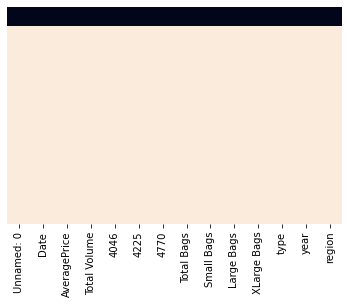

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [12]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [13]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x :x.month)
df['Date']=df['Date'].apply(lambda x: x.day)

In [15]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12
1,1.0,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12
2,2.0,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12
3,3.0,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6
4,4.0,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11


In [16]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

In [17]:
df['region']=pd.get_dummies(df['region'])
df['region']

0       1
1       1
2       1
3       1
4       1
       ..
1512    0
1513    0
1514    0
1515    0
1516    0
Name: region, Length: 1517, dtype: uint8

In [18]:
#correlation
df_cor=df.corr()
df_cor

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
Unnamed: 0,1.000000,-0.261166,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854,-0.081636,-0.598729
Date,-0.261166,1.000000,0.092589,-0.034857,-0.031806,-0.044008,-0.021318,-0.021137,-0.016462,-0.046578,0.019315,0.029744,0.016464,-0.024337
AveragePrice,-0.075531,0.092589,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.186314,0.060642
Total Volume,0.091934,-0.034857,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.073998,-0.055212
4046,0.092013,-0.031806,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.071180,-0.053007
4225,0.093566,-0.044008,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.070641,-0.058429
4770,0.075647,-0.021318,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.077827,-0.055079
Total Bags,0.081007,-0.021137,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.079839,-0.047747
Small Bags,0.083485,-0.016462,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.078694,-0.048978
Large Bags,0.065364,-0.046578,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.076932,-0.039242


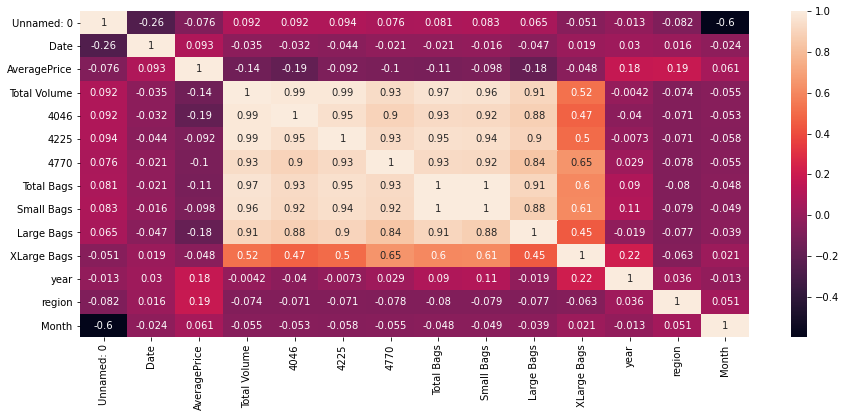

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(df_cor,annot=True)

# Univariate Analysis

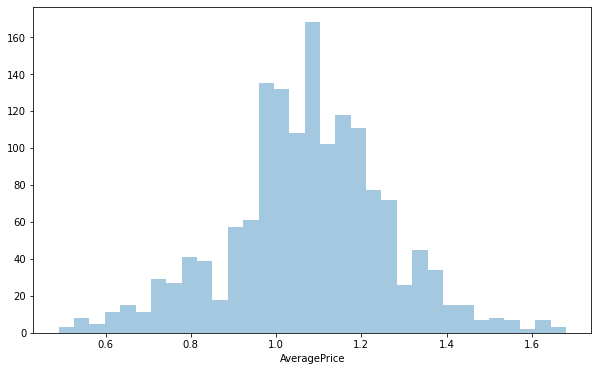

In [20]:
plt.figure(figsize=(10,6))

sns.distplot(df['AveragePrice'],kde=False)
            

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

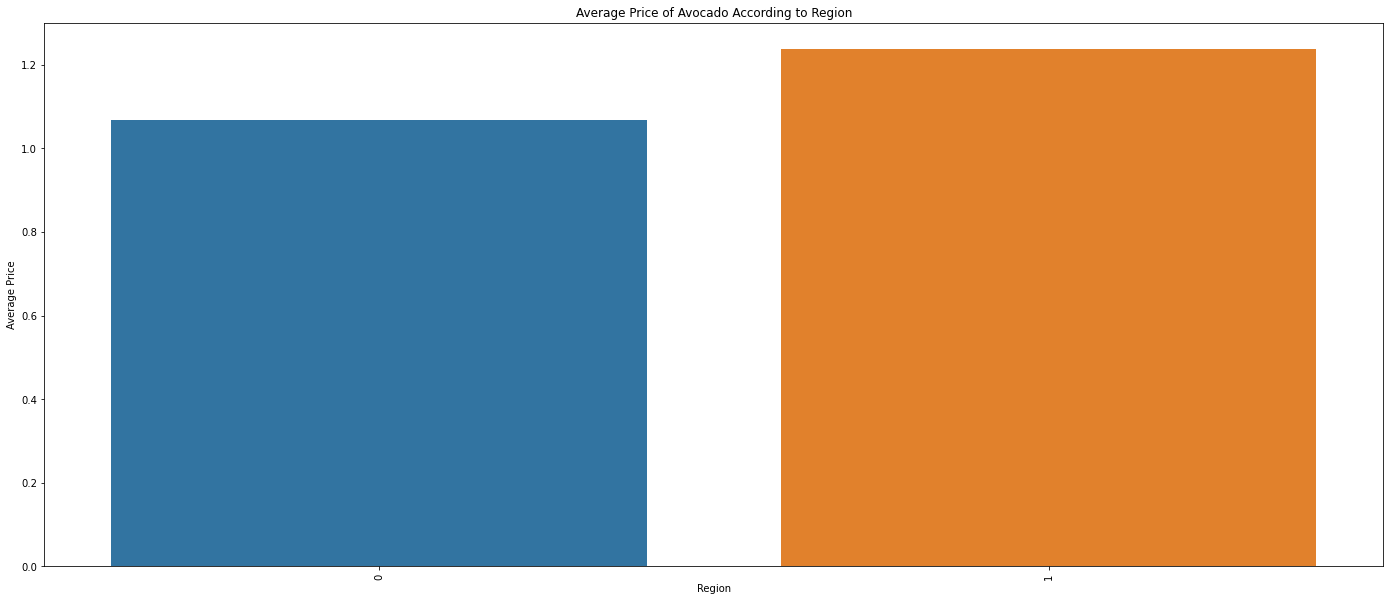

In [21]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0.5, 1.0, 'Average of Total Volume According to Region')

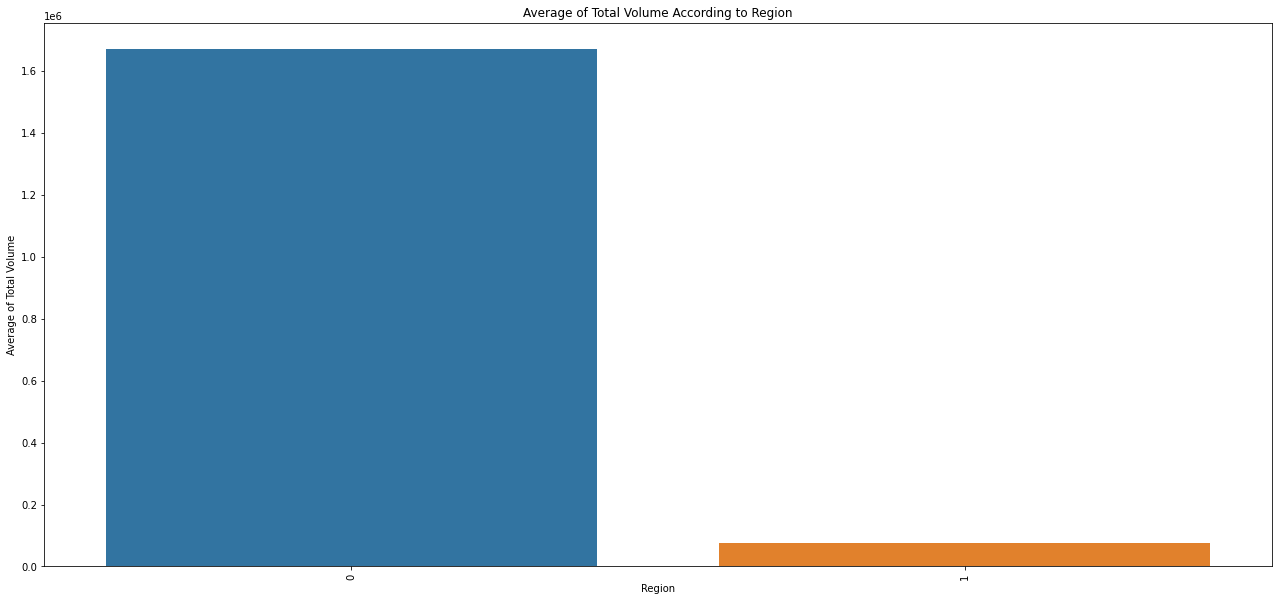

In [22]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Text(0.5, 1.0, 'Average Price')

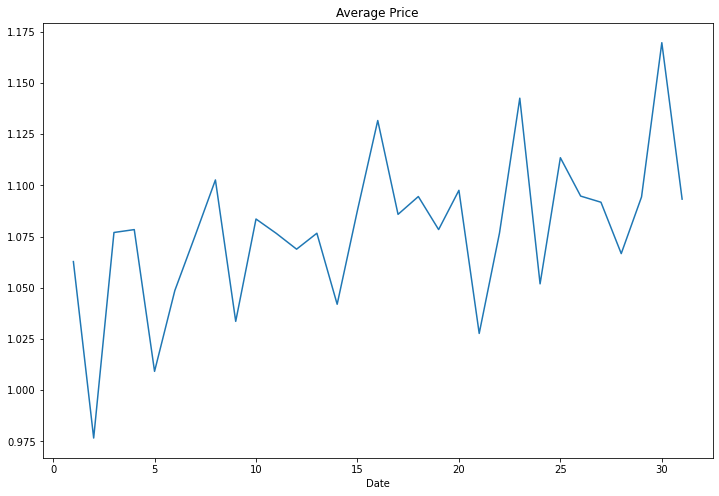

In [23]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [24]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,1,12
1,1.0,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,1,12
2,2.0,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,1,12
3,3.0,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,1,6
4,4.0,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,1,11


In [25]:
df=df.drop(['type'],axis=1)


In [26]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,0.0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,1,12
1,1.0,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,1,12
2,2.0,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,1,12
3,3.0,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,1,6
4,4.0,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,1,11


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
        df[column]=le.fit_transform(df[column])
    

In [28]:
df.dtypes

Unnamed: 0      float64
Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region            uint8
Month             int64
dtype: object

In [29]:
df['AveragePrice']

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [30]:
X=df.drop(columns='AveragePrice')
X

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,0.0,27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,1,12
1,1.0,20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,1,12
2,2.0,13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,1,12
3,3.0,12,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,1,6
4,4.0,29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,0,10
1513,11.0,10,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,0,9
1514,12.0,10,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,0,2
1515,13.0,25,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,0,9


In [31]:
y=df['AveragePrice']
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
print(X_train.shape,'\t\t',X_test.shape)

(1213, 13) 		 (304, 13)


In [35]:
#Importing all model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor


#importing error metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [36]:
model = [LinearRegression(),Lasso(),Ridge(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),
         AdaBoostRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor()]
for m in model:
    m.fit(X_train,y_train)
    score=m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Score of',m,'is:',score)
    print('MAE :',mean_absolute_error(y_test,predm))
    print('MSE :',mean_squared_error(y_test,predm))
    print('RMSE :',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 Score :',r2_score(y_test,predm))
    print('********************************************************************')
    print('\n')

Score of LinearRegression() is: 0.21010002076451018
MAE : 0.13110642985375226
MSE : 0.028567885556123225
RMSE : 0.16902037024016728
R2 Score : 0.18593165635229503
********************************************************************


Score of Lasso() is: 0.0
MAE : 0.14404480518071766
MSE : 0.03524373407766401
RMSE : 0.1877331459217152
R2 Score : -0.004302826969794671
********************************************************************


Score of Ridge() is: 0.2100644083023443
MAE : 0.13108117069182357
MSE : 0.02855123321674538
RMSE : 0.16897110172081314
R2 Score : 0.18640618017760746
********************************************************************


Score of SVR() is: 0.6152981487675107
MAE : 0.1013216284274861
MSE : 0.016282400130159972
RMSE : 0.1276025083223679
R2 Score : 0.5360179359957062
********************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE : 0.07148026315789474
MSE : 0.010035197368421053
RMSE : 0.10017583225719193


In [37]:
from sklearn.ensemble import ExtraTreesRegressor
etr = RandomForestRegressor()
score=etr.fit(X_train,y_train)
pred=etr.predict(X_test)
print('Score of',m,'is:',score)
print('MAE :',mean_absolute_error(y_test,pred))
print('MSE :',mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score :',r2_score(y_test,pred))

Score of ExtraTreesRegressor() is: RandomForestRegressor()
MAE : 0.05730657894736844
MSE : 0.005600893881578956
RMSE : 0.07483911999468564
R2 Score : 0.8403973442078473
